In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express

In [3]:
import plotly
from plotly import __version__
print(__version__)

import cufflinks as cf
from plotly.offline import download_plotlyjs , init_notebook_mode , plot ,iplot

init_notebook_mode(connected = True)
cf.go_offline()

5.9.0


# Problem Statement for the Car Price Dataset


### The objective is to develop a predictive model that accurately estimates the price of a car based on various features such as engine size, horsepower, fuel type, and other car attributes. 
### This model will help manufacturers, dealers, and customers make data-driven decisions regarding car pricing.

# Car Price DataSet

In [4]:
cp = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\New folder\car_price.csv")    # load dataset
cp

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,gas,std,four,sedan,rwd,front,109.1,volvo,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,gas,turbo,four,sedan,rwd,front,109.1,volvo,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,gas,std,four,sedan,rwd,front,109.1,volvo,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,diesel,turbo,four,sedan,rwd,front,109.1,volvo,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
cp.columns    # column namesin dataset

Index(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [6]:
cp=cp.replace({'?':np.nan})  # replace '?' by null to fill null values

In [7]:
cp.isnull().sum()[cp.isnull().sum()>0]     # it checks how many nulls present in column

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [8]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       203 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [9]:
cp.normalized_losses = cp.normalized_losses.astype(float)    # to change datatype of column 
cp.bore       = cp.bore.astype(float)
cp.stroke      = cp.stroke.astype(float)
cp.horsepower   = cp.horsepower.astype(float)
cp.peak_rpm      = cp.peak_rpm.astype(float)
cp.price      = cp.price.astype(float)

In [10]:
cp.normalized_losses.fillna(cp.normalized_losses.mean() , inplace = True)   # it fills null values by mean /median
cp.num_of_doors.fillna('four' , inplace = True)
cp.bore.fillna(cp.bore.mean(), inplace = True)
cp.stroke.fillna(cp.stroke.mean(), inplace = True)
cp.horsepower.fillna(cp.horsepower.mean(), inplace = True)
cp.peak_rpm.fillna(cp.peak_rpm.mean() , inplace = True)

In [11]:
cp.isnull().sum()[cp.isnull().sum()>0]

price    4
dtype: int64

 IF there are any null in target variable then we do not fill of them just drop them because we never assume any value to fill these nulls


In [12]:
cp = cp.dropna()    #it drops null values in target variable

In [13]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

# EDA 

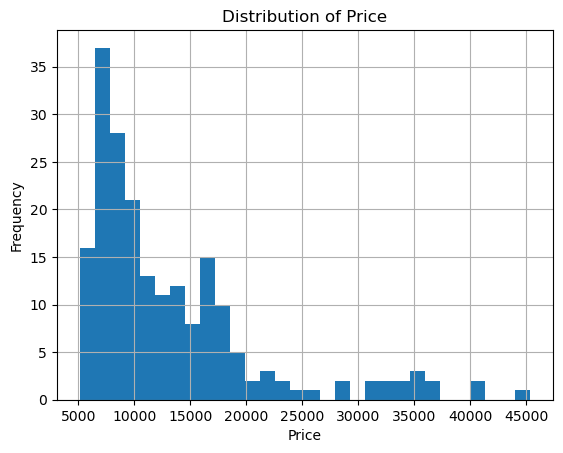

In [14]:
cp['price'].hist(bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



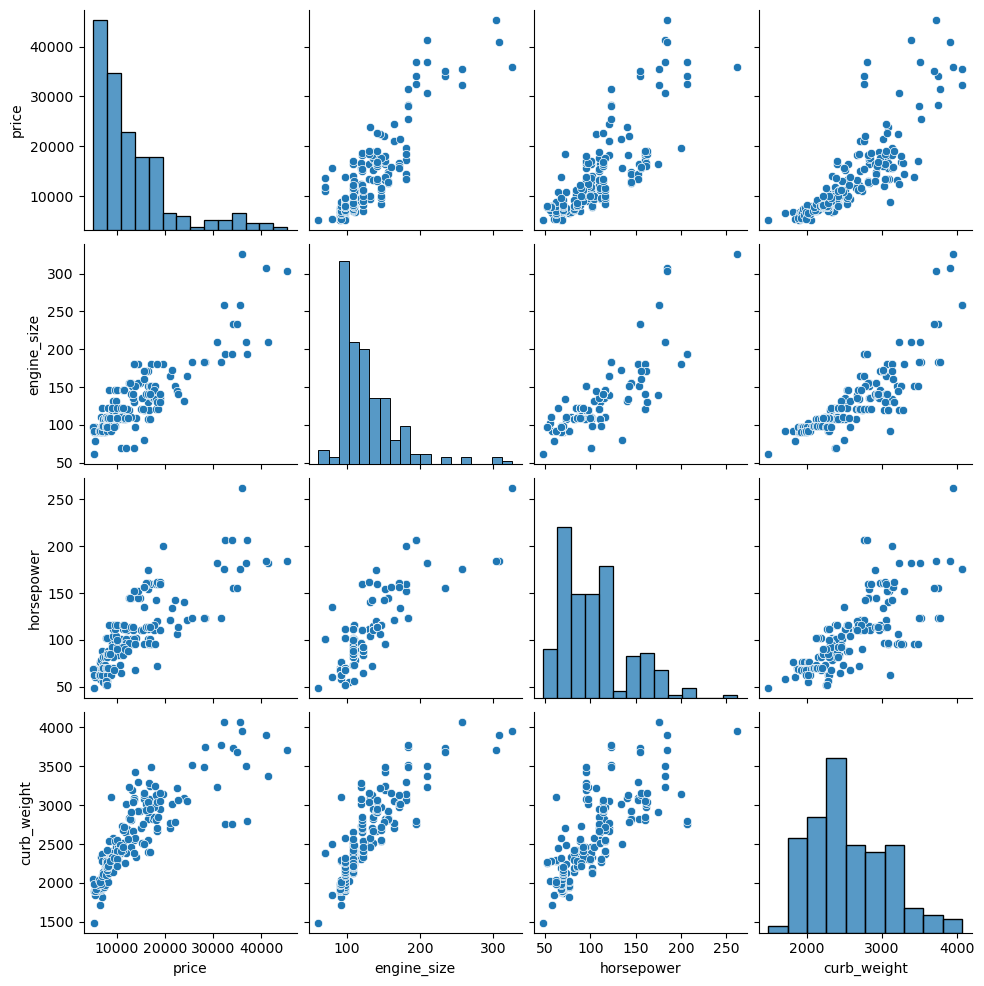

In [15]:
sns.pairplot(cp[['price', 'engine_size', 'horsepower', 'curb_weight']])
plt.show()

The diagonal contains histograms that show the distribution of each variable:

Price: Right-skewed, indicating most cars are in the lower price range.

Engine Size: Right-skewed, with smaller engine sizes being more frequent.

Horsepower: Right-skewed, with the majority of cars having lower horsepower.

Curb Weight: Normal distribution, with most cars having an average curb weight.

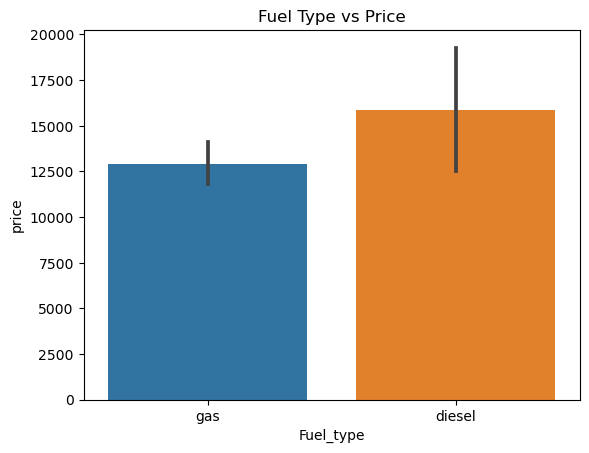

In [16]:
sns.barplot(x='Fuel_type', y='price', data=cp)
plt.title('Fuel Type vs Price')
plt.show()

## Data Cleaning

In [17]:
cp.select_dtypes(include = 'object').columns

Index(['Fuel_type', 'make', 'num_of_doors', 'aspiration', 'wheel_base',
       'engine_location', 'body_style', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

In [18]:
cp.num_of_cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

### convert categorical column into numeric

In [19]:
cp.num_of_doors.replace({'two':2, 'four':4} , inplace = True)
cp.num_of_cylinders.replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}, inplace = True)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
cp[cp.select_dtypes(include = 'object').columns] = cp[cp.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [22]:
cp.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [23]:
cp.head(2)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,2,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,2,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [24]:
# Feature importance

In [25]:
df_x = cp.iloc[: , 0:-1]
df_y = cp.iloc[: , -1]

corr_list = []
for col in df_x.columns:
    corr_list.append(df_x[col].corr(df_y))
    
feature_imp    = pd.DataFrame()
feature_imp['feature'] = df_x.columns
feature_imp['corr'] = corr_list
feature_imp



featureimp = feature_imp[(feature_imp['corr'] < -.1 )| (feature_imp['corr'] > .1)]
featureimp

l1 = list(featureimp.feature)
l1.append('price')
l1

cp = cp.loc[:,l1]
cp.shape 

(201, 21)

In [26]:
# sampling

In [27]:
from sklearn.model_selection import train_test_split     

In [28]:
cp_train , cp_test = train_test_split(cp , test_size = .2)              # 


cp_train_x = cp_train.iloc[: , 0:-1]
cp_train_y = cp_train.price

cp_test_x = cp_test.iloc[: , 0:-1]
cp_test_y = cp_test.price

In [29]:
# Linear regression

In [30]:
from sklearn.linear_model import LinearRegression
linreg_cp = LinearRegression()

In [31]:
linreg_cp.fit(cp_train_x , cp_train_y)   

LinearRegression()

##### Rsquare

In [32]:
Rsquare = linreg_cp.score(cp_train_x , cp_train_y)
Rsquare                                                


0.886768670300404

##### Adjusted Rsquare

In [33]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]
Adj_Rsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
Adj_Rsquare

0.8704763926457858

##### Prediction

In [34]:
pred_train = linreg_cp.predict(cp_train_x)           # model prediction on train
pred_test = linreg_cp.predict(cp_test_x)             # model prediction on test

err_train_cp = cp_train_y - pred_train
err_test_cp = cp_test_y - pred_test

err_train_cp.mean()                                   # error on train

-9.00399754755199e-12

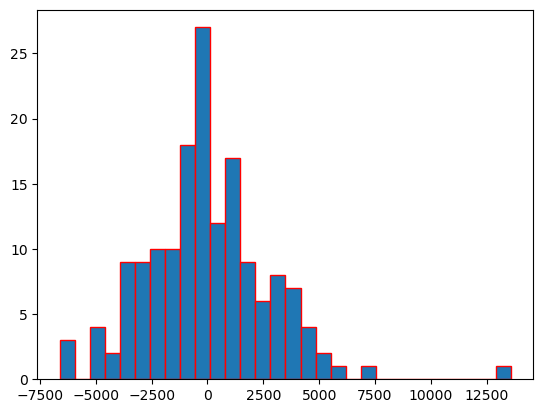

In [35]:
plt.hist(err_train_cp , bins = 30 , edgecolor = 'red');

errors are normally distributed

In [36]:
err_train_cp.kurtosis() +3              #  kurtosis is 3

6.092324677757083

In [37]:
err_train_cp.skew()      #skewness is zero

0.70609484138569

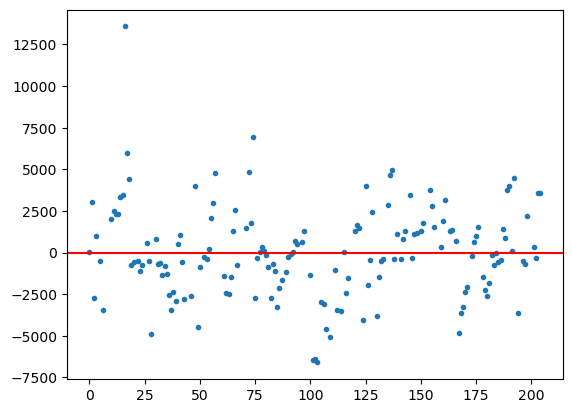

In [38]:
plt.plot(err_train_cp , '.')
plt.axhline(y=0 , color = 'red')               

<Axes: xlabel='Actual', ylabel='Pred'>

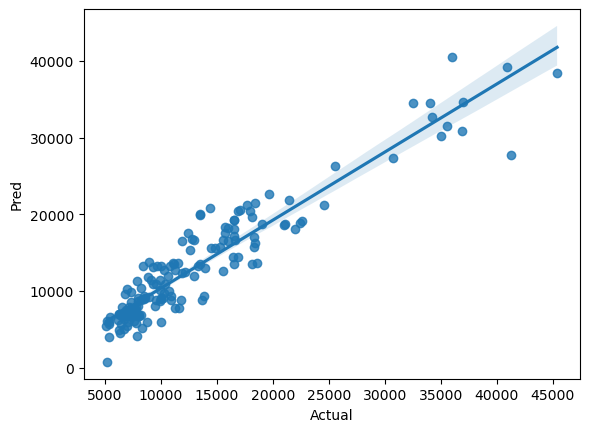

In [39]:
pred_actual_cp = pd.DataFrame()
pred_actual_cp['Actual'] = cp_train_y
pred_actual_cp['Pred'] = pred_train
sns.regplot(x = 'Actual', y = 'Pred' , data = pred_actual_cp )

In [40]:
mse_train = np.mean(np.square(err_train_cp))
rmse_train = np.sqrt(np.mean(np.square(err_train_cp)))
mape_train = np.mean(np.abs(err_train_cp*100/cp_train_y))

print('Values of MSE , RMSE, MAPE ----> ' , mse_train," ", rmse_train," ", mape_train)

Values of MSE , RMSE, MAPE ---->  7496766.262065667   2738.022326801896   16.618509897217933


In [41]:
mse_test = np.mean(np.square(err_test_cp))
rmse_test = np.sqrt(np.mean(np.square(err_test_cp)))
mape_test = np.mean(np.abs(err_test_cp*100/cp_test_y))

print('Values of MSE , RMSE, MAPE ----> ' , mse_test," ", rmse_test," ", mape_test)

Values of MSE , RMSE, MAPE ---->  8774770.978546562   2962.223991960527   21.131801170007957


In [42]:
accuracy = 100-mape_test
accuracy

78.86819882999204

# Random forest

In [43]:
from  sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=4)

In [44]:
rf.fit(cp_train_x , cp_train_y)

RandomForestRegressor(random_state=4)

rsquare for train

In [45]:
r2_score = rf.score(cp_train_x, cp_train_y)    

In [46]:
r2_score

0.9910150372307509

rsquare for test

In [47]:
r2_score_test = rf.score(cp_test_x, cp_test_y)
r2_score_test 

0.8912319576194808

In [48]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]
Adj_Rsquare = 1-(1-r2_score_test)*(N-1)/(N-K-1)
Adj_Rsquare

0.8755818795791184

In [63]:
pred_train_rf = rf.predict(cp_train_x)           # model prediction on train
pred_test_rf = rf.predict(cp_test_x)             # model prediction on test

err_train_rf = cp_train_y - pred_train_rf            # error 
err_test_rf = cp_test_y - pred_test_rf

err_train_rf.mean()  

32.29895486111107

<Axes: xlabel='Actual', ylabel='Pred'>

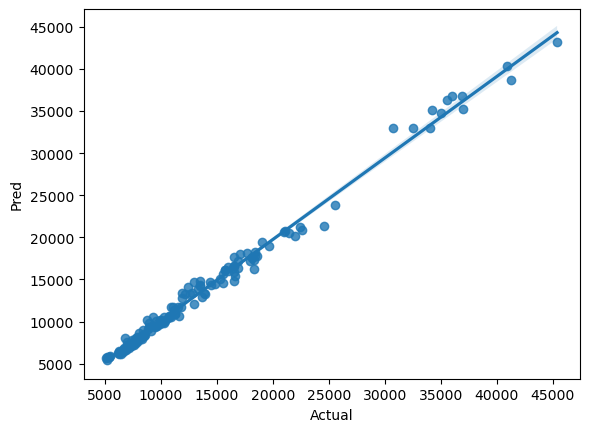

In [64]:
pred_actual_cp = pd.DataFrame()
pred_actual_cp['Actual'] = cp_train_y
pred_actual_cp['Pred'] = pred_train_rf
sns.regplot(x = 'Actual', y = 'Pred' , data = pred_actual_cp )

In [72]:
mse_test = np.mean(np.square(err_test_rf))
rmse_test = np.sqrt(np.mean(np.square(err_test_rf)))
mape_test_rf = np.mean(np.abs(err_test_rf*100/cp_test_y))

print('Values of MSE , RMSE, MAPE ----> ' , mse_test," ", rmse_test," ", mape_test)

Values of MSE , RMSE, MAPE ---->  5406139.027961229   2325.110541019766   14.404725029430779


In [73]:
accuracy = 100-mape_test_rf
accuracy

88.3499799514594

# decision tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt_cp = DecisionTreeRegressor(min_samples_split=2)

In [52]:
dt_cp.fit(cp_train_x , cp_train_y)

DecisionTreeRegressor()

In [53]:
r2_score_test = dt_cp.score(cp_test_x, cp_test_y)
r2_score_test 

0.834219806240526

In [54]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]
Adj_Rsquare = 1-(1-r2_score_test)*(N-1)/(N-K-1)
Adj_Rsquare

0.8103665409513932

In [67]:
pred_train_dt = dt_cp.predict(cp_train_x)           # model prediction on train
pred_test_dt = dt_cp.predict(cp_test_x)             # model prediction on test

err_train_dt = cp_train_y - pred_train_dt
err_test_dt = cp_test_y - pred_test_dt

err_train_dt.mean()  

0.0

<Axes: xlabel='Actual', ylabel='Pred'>

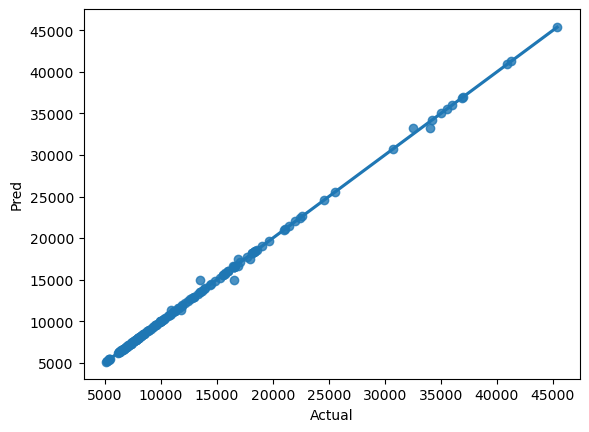

In [68]:
pred_actual_cp = pd.DataFrame()
pred_actual_cp['Actual'] = cp_train_y
pred_actual_cp['Pred'] = pred_train_dt
sns.regplot(x = 'Actual', y = 'Pred' , data = pred_actual_cp )

In [70]:
mse_test = np.mean(np.square(err_test_dt))
rmse_test = np.sqrt(np.mean(np.square(err_test_dt)))
mape_test_dt = np.mean(np.abs(err_test_dt*100/cp_test_y))

print('Values of MSE , RMSE, MAPE ----> ' , mse_test," ", rmse_test," ", mape_test)

Values of MSE , RMSE, MAPE ---->  8239835.4878048785   2870.5113634690383   14.404725029430779


In [71]:
accuracy = 100-mape_test_dt
accuracy

85.59527497056922